In [1]:
import numpy as np
import pandas as pd #read .csv file
import matplotlib.pyplot as plt #drawing

In [7]:
def load_data(train_row):
    train = pd.read_csv("train.csv")
    print(train.shape)
    x_train = train.values[0:train_row, 1:] #get column 1~784
    y_train = train.values[0:train_row, 0] #get column0: label
    
    predict_test = pd.read_csv("test.csv").values
    print (predict_test.shape)
    return x_train, y_train, predict_test

train_row = 5000
origin_x_train, origin_y_train, origin_y_test = load_data(train_row)
    

(42000, 785)
(28000, 784)


In [8]:
print(origin_x_train.shape, origin_y_train.shape, origin_y_test.shape)

(5000, 784) (5000,) (28000, 784)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


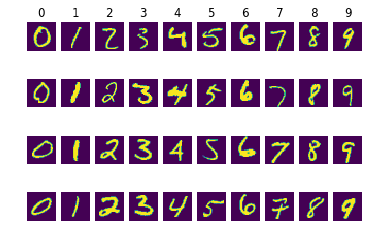

In [13]:
#show part of the digit
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
rows = 4

print(classes)
for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in origin_y_train])
    idxs = np.random.choice(idxs[0], rows)
    for i , idx in enumerate(idxs):
        plt_idx = i * len(classes) + y + 1
        plt.subplot(rows, len(classes), plt_idx)
        plt.imshow(origin_x_train[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)
        
plt.show()

In [17]:
#test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(origin_x_train,
                                                    origin_y_train,
                                                    test_size = 0.2,
                                                    random_state = 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


In [34]:
#demo np.tile for finding distance
a = [1, 2, 3]
b = np.tile(a, (5, 2))
print(b)


a_bar = [6, 5, 4]
b_bar = np.tile(a_bar, (5, 2))
print(b_bar)

diff = b_bar - b
print(diff)

sqDiff = diff ** 2
print(sqDiff)

# sqrtDiff = sqDiff ** 0.5
# print(sqrtDiff)

sum = sqDiff.sum(axis = 0)
print(sum)

sum = sqDiff.sum(axis = 1)
print(sum)

dis = sum ** 0.5
print(dis)

[[1 2 3 1 2 3]
 [1 2 3 1 2 3]
 [1 2 3 1 2 3]
 [1 2 3 1 2 3]
 [1 2 3 1 2 3]]
[[6 5 4 6 5 4]
 [6 5 4 6 5 4]
 [6 5 4 6 5 4]
 [6 5 4 6 5 4]
 [6 5 4 6 5 4]]
[[5 3 1 5 3 1]
 [5 3 1 5 3 1]
 [5 3 1 5 3 1]
 [5 3 1 5 3 1]
 [5 3 1 5 3 1]]
[[25  9  1 25  9  1]
 [25  9  1 25  9  1]
 [25  9  1 25  9  1]
 [25  9  1 25  9  1]
 [25  9  1 25  9  1]]
[125  45   5 125  45   5]
[70 70 70 70 70]
[ 8.36660027  8.36660027  8.36660027  8.36660027  8.36660027]


In [53]:
from sklearn.metrics import accuracy_score

class KNN():
    def __init__(self):
        pass
    
    def fit(self, x, y): #train
        self.x_train = x
        self.y_train = y
        
    def predict(self, x, k = 3):
        dataSet = self.x_train
        labels = self.y_train
        
        
        #calculate the distance between current data and x_train 
        #then get the sqrt(sum of distance^2)
        dataSetSize = dataSet.shape[0]
        diffMatrix = np.tile(x, (dataSetSize, 1)) - dataSet#expand x to the size of x_train; then subtract one by one
        sqrtDiffMatrix = diffMatrix ** 2
        sumDiffMatrix = sqrtDiffMatrix.sum(axis = 1)
        distances = sumDiffMatrix ** 0.5
        
        #sort to find k nearest
        sortDistances = distances.argsort() #numpy sort
        
        classCount = {}
        
        for i in range(k):
            vote = labels[sortDistances[i]]
            classCount[vote] = classCount.get(vote, 0) + 1;
            
        max = 0
        ans = 0
        
        for k, v in classCount.items():
            if(v > max): 
                ans = k
                max = v
        
        return ans
            

In [54]:
knn = KNN()
knn.fit(x_train, y_train)

for k in range (1,4):
    print('K = ' + str(k) + ', start training')
    predictions = np.zeros(len(y_test))
    
    for i in range(x_test.shape[0]):
        if i % 500 == 0:
            print ("Computing " + str(i + 1) + "/" + str(int(len(x_test))) + "...")
        
        output = knn.predict(x_test[i], k)
        predictions[i] = output
    
    #handle accuricy
    accuracy = accuracy_score(y_test, predictions)
    print('When k = ' + str(k), ' accuracy = ' + str(accuracy))

K = 1, start training
Computing 1/1000...
Computing 501/1000...
When k = 1  accuracy = 0.919
K = 2, start training
Computing 1/1000...
Computing 501/1000...
When k = 2  accuracy = 0.919
K = 3, start training
Computing 1/1000...
Computing 501/1000...
When k = 3  accuracy = 0.925


In [ ]:
print(y_test)
print(predictions)

In [ ]:
#test
k = 3
predictions = np.zeros(origin_y_test.shape[0])
for i in range(origin_y_test.shape[0]):
    if i % 500 ==0:
        print("Computing  " + str(i+1) + "/" + str(int(len(origin_y_test))) + "...")
    predictions[i] = knn.predict(origin_y_test[i], k)

Computing  1/28000...
Computing  501/28000...
Computing  1001/28000...
Computing  1501/28000...
Computing  2001/28000...
Computing  2501/28000...
Computing  3001/28000...
Computing  3501/28000...
Computing  4001/28000...
Computing  4501/28000...
Computing  5001/28000...
Computing  5501/28000...
Computing  6001/28000...
Computing  6501/28000...
Computing  7001/28000...
Computing  7501/28000...
Computing  8001/28000...
Computing  8501/28000...
Computing  9001/28000...
Computing  9501/28000...
Computing  10001/28000...
Computing  10501/28000...
Computing  11001/28000...
Computing  11501/28000...
Computing  12001/28000...
Computing  12501/28000...
Computing  13001/28000...
Computing  13501/28000...
Computing  14001/28000...
Computing  14501/28000...
Computing  15001/28000...
Computing  15501/28000...
Computing  16001/28000...
Computing  16501/28000...
Computing  17001/28000...
Computing  17501/28000...
Computing  18001/28000...
Computing  18501/28000...
Computing  19001/28000...
Computing 

In [ ]:
print(len(predictions))
out_file = open("predicitons.csv", "w")
out_file.write("ImageId,Label\n")
for i in range(len(predictions)):
    out_file.write(str(i+1) + "," + str(int(predictions[i])) + "\n")
out_file.close()
